In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
ages= [18, 20, 25, 24, 18, 19, 26, 28, 29, 30, 30, 32, 33, 34, 36, 36, 44, 45, 48, 57]

### 1. Перцентиль

**Перцентиль** - это число, ниже которого попадает заданный **процент** значений

In [6]:
print(np.sort(ages))

[18 18 19 20 24 25 26 28 29 30 30 32 33 34 36 36 44 45 48 57]


In [7]:
len(ages)

20

In [3]:
#в метод percentile передается список и процент значений
np.percentile(ages, 50)

30.0

In [4]:
#порядок расчета перцентиля
#сначала значения сортируются по возврастанию
#затем находится число, ниже которого попадает заданный процент значений
print(np.sort(ages))
np.percentile(ages, 50)

[18 18 19 20 24 25 26 28 29 30 30 32 33 34 36 36 44 45 48 57]


30.0

In [158]:
#медиана - это 50-тый перцентиль
np.median(ages)

30.0

Функция np.percentile() использует линейную интерполяцию для вычисления перцентиля. Это означает, что если значение не является целым числом, функция использует интерполяцию между ближайшими значениями для расчета точного значения перцентиля.

In [5]:
#найдем 10-ый перцентиль
np.percentile(ages, 10)

18.9

In [160]:
#25-ый перцентиль
np.percentile(ages, 25)

24.75

In [161]:
#75-ый перцентиль
np.percentile(ages, 75)

36.0

### 2. Квантиль и квартиль

**Квантиль** - это число, ниже которого попадает заданная **доля** значений

In [162]:
np.percentile(ages,10)

18.9

In [163]:
np.quantile(ages,0.10)

18.9

**Квартиль** - это тип квантиля, который делит количество точек данных на четыре части

Существует три основных типа квартилей:
- Первый квартиль (Q1) представляет собой значение, ниже которого находится 25% значений данных.
- Медиана (Q2 или второй квартиль) - значение, ниже которого находится 50% значений данных.
- Третий квартиль (Q3) - значение, ниже которого находится 75% значений данных.

In [164]:
print(np.quantile(ages, 0.25)) #25-й квантиль или 1-й квартиль
print(np.quantile(ages, 0.50)) #50-й квантиль или 2-й квартиль
print(np.quantile(ages, 0.75)) #75-й квантиль или 3-й квартиль

24.75
30.0
36.0


**Задача**: Вы работаете в стартапе - в сервисе доставки еды из ресторанов. Позиционирование сервиса - доставка еды в течение часа. Необходимо проверить доставляется ли 95% заказов в течение часа.

In [175]:
np.random.seed(0) #создаем идемпотентный рандом
delivery_time = np.random.normal(40, 20, 100)

In [177]:
delivery_time[:20]

array([75.28104692, 48.00314417, 59.57475968, 84.81786398, 77.3511598 ,
       20.4544424 , 59.00176835, 36.97285583, 37.93562296, 48.21197004,
       42.88087142, 69.08547014, 55.2207545 , 42.43350033, 48.87726465,
       46.67348655, 69.88158146, 35.89683472, 46.26135403, 22.91808521])

In [178]:
np.quantile(delivery_time, 0.95)

75.79909737436084

### 3. Box plot a.k.a ящик с усами a.k.a диаграмма размаха

**Box plot** (диаграмма размаха) - это метод визуализации, используемый в статистике для отображения распределения данных и представления основных характеристик набора данных, таких как медиана, квартили, минимальные и максимальные значения, а также наличие выбросов.

Основные компоненты диаграммы размаха включают:
- Прямоугольник (коробка), который отображает межквартильный размах (между первым и третьим квартилями (25-й и 75-й перцентили));
- Горизонтальная линия внутри коробки - медиана;
- Усы, которые представляют собой линии, выходящие из коробки и доходящие до минимального и максимального значения данных;
- Возможные выбросы, отображаемые как отдельные точки за пределами усов.

Box plot помогает быстро оценить центральную тенденцию, разброс и форму распределения данных, а также выявлять наличие выбросов. Он является важным инструментом для визуального анализа структуры набора данных.

**Ящик с усами для возврастов сотрудников**

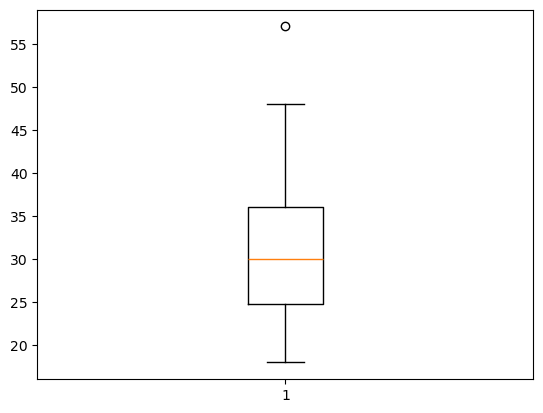

In [179]:
plt.boxplot(ages)
plt.show()

Что видно на графике:
1. Минимальное и максимальное значение, можно посчитать размах
3. Медиана
4. Первый и и третий квартили, можно посчитать межквартильный размах
5. Выбросы

В ящике с усами (box plot) **выбросы** обычно определяются с использованием межквартильного размаха (IQR) и критерия 1.5*IQR. 

Межквартильный размах (Interquartile range, сокр. IQR) - это разница между третьим квартилем (Q3) и первым квартилем (Q1). 

Для определения выбросов в box plot:
- Верхний "ус" (верхняя граница ящика) располагается на Q3 + 1.5 * IQR.
- Нижний "ус" (нижняя граница ящика) располагается на Q1 - 1.5 * IQR.

Любые значения за пределами верхнего и нижнего "усов" рассматриваются как потенциальные выбросы и обозначаются точками на графике box plot.

**Задача**: cравним возврасты сотрудников рассматриваемой компании с возрастами сотрудников некой другой компании

In [180]:
ages_second_companies = [30, 25, 31, 23, 40, 41, 43, 35, 35, 23]

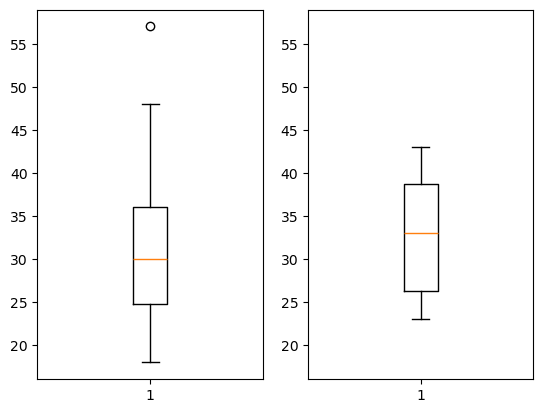

In [181]:
fig, axs = plt.subplots( ncols= 2)
axs[0].boxplot(ages)
axs[1].boxplot(ages_second_companies)
plt.ylim(16, 59)
plt.show()

Что видно на графиках: 
1. У первой группы больше размах
2. У второй группы немного больше межквартильный размах
3. Медиана возраста у второй группы выше
4. У первой группы есть выбросы, а у второй группы выбросов нет

**Ящик с усами для заработных плат**

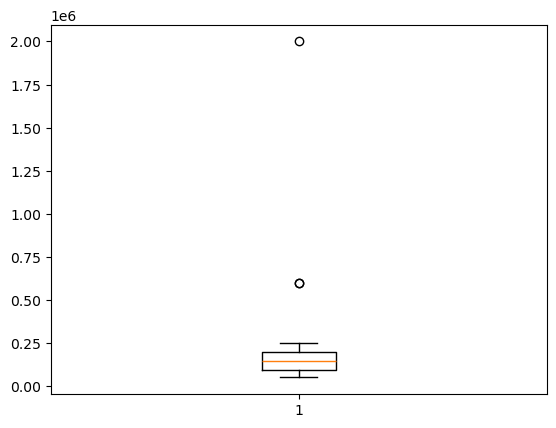

In [182]:
salary = [50000, 50000, 80000, 80000, 120000, 120000, 130000, 150000, 140000, 190000, 
          80000, 150000, 250000, 600000, 150000, 
          100000, 210000, 150000, 600000, 2000000]
plt.boxplot(salary)
plt.show()